# **Assignment 1: Text Classification**

Due: 4/20 (Tuesday) 11:59pm on Canvas. Please work in a group of 2 on this assignment. 

For this assignment, we’ll be building a text classifier. The goal of our text classifer will be to distinguish between words that are simple and words that are complex. Example simple words are *heard*, *sat*, *feet*, *shops*, and *town*, and example complex words are *abdicate*, *detained*, *liaison*, and *vintners*. Distinguishing between simple and complex words is the first step in a larger NLP task called *text simplification*, which aims to replace complex words with simpler synonyms. Text simplification is potentially useful for re-writing texts so that they can be more easily understood by younger readers, people learning English as a second language, or people with learning disabilities.

**The learning goals of this assignment are**:
- Understand an important class of NLP evaluation methods (precision, recall and F1), and implement them yourself.
- Employ common experimental design practices in NLP. Split the annotated/labeled data into training/development/test sets, implement simple baselines to determine how difficult the task is, and experiment with a range of features and models.
- Get an introduction to [sklearn](https://scikit-learn.org/stable/), an excellent machine learning Python package.

We will provide you with training and development data that has been manually labeled. We will also give you a test set without labels. You will build a classifier to predict the labels on our test set. I will score its predictions and maintain a leaderboard showing whose classifier has the best performance.

**This exercise will take 12% of the total final grade.** If you wish to discuss any of it, feel free to bring it to the instructor during office hours. 


**Attention:** DO NOT edit this file. All your changes to this file cannot be saved and will get lost. Make your own copy of this file for editing.

See the instruction from the previoius assignment for making a copy of this file. 


**Here are some materials that you should download for this assignment**
- [Skeleton code](https://colab.research.google.com/drive/1Se8ZymrrC5HVlYA7NXt5gPAApn7TSrdF?usp=sharing) - this provides some of the functions that you should implement.
-[Data sets](https://drive.google.com/file/d/1hhMEFODGWdf1zy8CQZZuv4FQWdWcBPd2/view?usp=sharing) - this is a tarball with the training/dev/test sets.
-[Unigram counts](https://drive.google.com/file/d/1ZPg5iY8tujB-YyhI5xyeeCBB0aGjQtPc/view?usp=sharing) from the Google N-gram corpus.

0-1. Mount Google Drive

You need to mount Google drive first on Google Colab space so you can access the files in your Google drive. When you do so, you will be asked to go to an URL to retrieve an authorization code and enter it here.

Goal in thie following cell: load the Drive helper and mount

It will show Drive mounted at /content/gdrive after mounted.

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
# explaination of drive.mount()
# This will prompt for authorization for accessing the data on your Google Drive
# You need to (i) click the link showed after execute, (ii) copy the code, 
# (iii) paste below and (iv) press "Enter"

Mounted at /content/gdrive


**This assignment has several deliverables:**

- 	Your implementations for the functions in the skeleton code.
-  Your model’s output for the test set (your model will be ranked on a leaderboard against the other students’ outputs)
- Your writeup about the homework.  

**Submission**
- link to your code file (**with output**. same as assignment0)
- report in pdf (here is a sample writeup: [in pdf](https://drive.google.com/file/d/12wRlXeDaI04Loz13U94XD-7d23-mM3Z3/view?usp=sharing)) 
 - see the Acknowledgement at the end of this file.
 - As our requirements for this assignment are not exactly the same as theirs, please take the sample file with a grain of salt. 
- your output labels of the test data in a .txt file.

**The submission link will be closed at 11:59pm 4/20 (Tuesday). No late submission will be accepted.**

**Identifying Complex Words**

Automated text simplification is an NLP task, where the goal is to take as input a complex text, and return a text that is easier to understand. One of the most logical first steps in text simplification, and example of text classification, is identifying which words in a text are hard to understand, and which words are easy to understand.

We have prepared a labeled training set for this assignment. We provide a dataset of words and their corresponding sentences that has been split into training, development, and test sets. The training set is disjoint, so if a word appears in the training set, it will not also appear in the test set or the development set.

This dataset was collected by taking the first 200 tokens in 200 complex texts, and crowdsourcing human judgements. We asked nine human annotators to identify at least 10 complex words in each text. From here, words that were identified as complex by at least 3 annotators were labeled as complex. In addition, words that were identified as complex by zero annotators were labeled as simple. One thing to note is that we kept only nouns, verbs, adjectives, and adverbs, and removed stopwords (i.e. common words like *the* or *and*) and proper nouns. After this filtering, we were left with 5,922 unique words. For this homework, we split these words up into 4,000 words for training, 1,000 words for development, and the remaining 922 words are reserved for testing.

Shown below is an example of the training data. Note that the training data and development data files have the same formatting, and the test data does not include the label column:


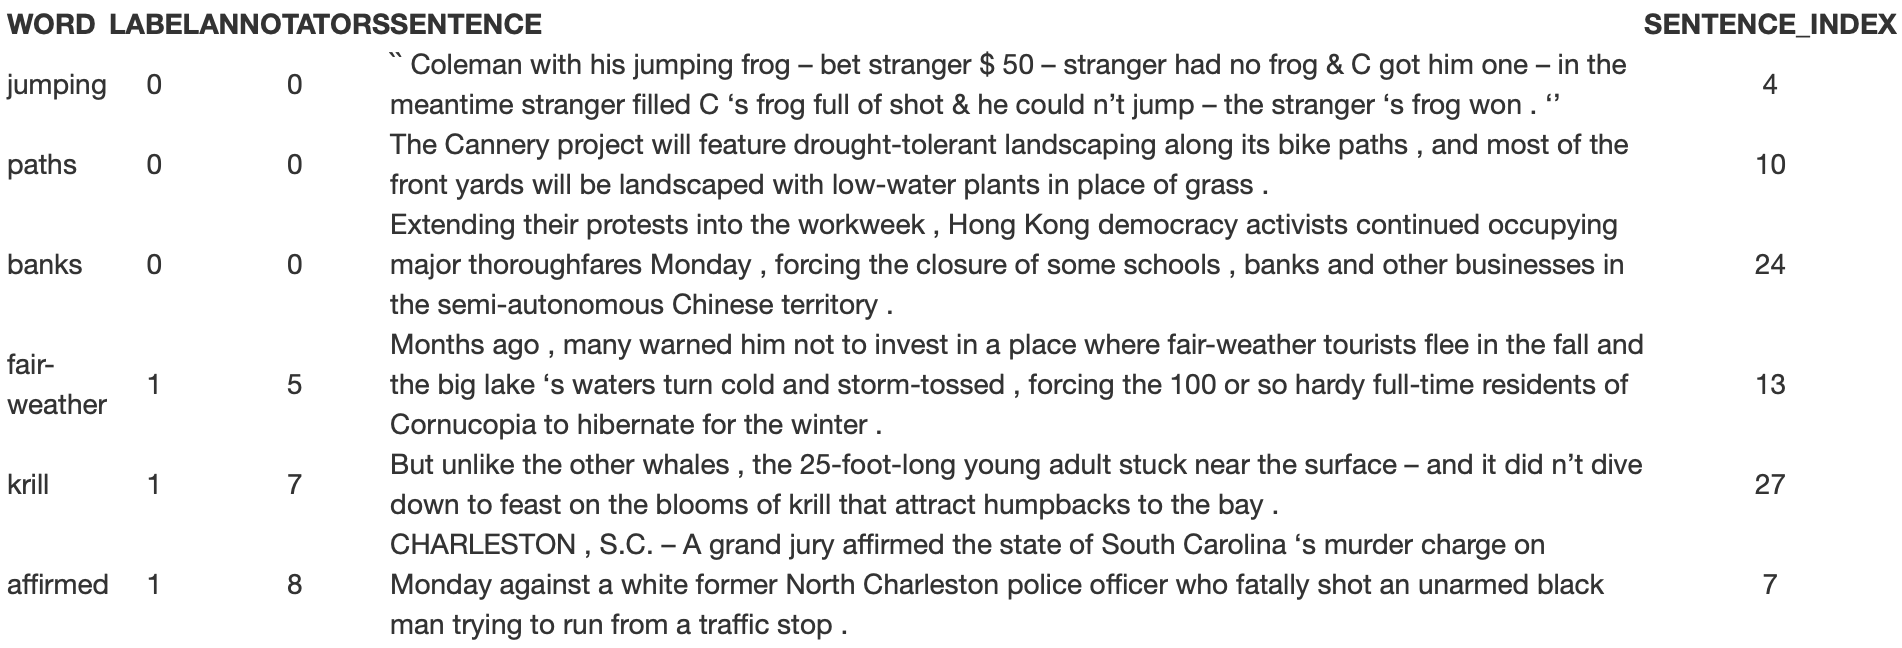

Here is what the different fields in the file mean:

- WORD: The word to be classified
-LABEL: 0 for simple words, 1 for complex words
-ANNOTATORS: The number of annotators who labeled the word as complex
-SENTENCE: The sentence that was shown to annotators when they labeled the word as simple or complex
-SENTENCE_INDEX: The index of the word in the sentence (0 indexed, space delimited).




We have provided the function `load_file(data_file)`, 
which takes in the file name (`data_file`) of one of 
the datasets, and reads in the words and labels from these files. 

**CLARIFICATION**: You should make sure your load_file() function makes every word lowercase. 

**Note**: While the context from which each word was found is provided, you do not need it for the majority of the assignment. The only time you may need this is if you choose to implement any context-based features in your own classifier in Section 4.

# **Part 1- Implement the Evaluation Metrics** 

Before we start with this text classification task, we need to first determine how we will evaluate our results. The most common metrics for evaluating binary classification are *precision*, *recall*, and *f-score*. For this assignment, complex words are considered positive examples, and simple words are considered negative examples.

- `get_precision(y_pred, y_true)`
- `get_recall(y_pred, y_true)`
- `get_fscore(y_pred, y_true)`

Here, `y_pred` is list of predicted labels from a classifier, and `y_true` is a list of the true labels.

You may **NOT** use sklearn’s built-in functions for this, you must instead write YOUR OWN code to calculate these metrics. You will be using these functions to evaluate your classifiers later on in this assignment.



# **Part 2- Three Baselines**

**1. A majority class baseline**

You should start by implementing simple baselines as classifiers. Your first baseline is a majority class baseline which is one of the simpliest classifiers. You should complete the function `all_complex(data_file)`, which takes in the file name of one of the datasets, labels each word in the dataset as complex, and returns out the *precision*, *recall*, and *f-score*.

Please report the *precision*, *recall*, and *f-score* on both the training data and the development data individually to be graded.

**2. Word length baseline**

For our next baseline, we will use a slightly complex baseline, the length of each word to predict its complexity.

For the word length baseline, you should try setting various thresholds for word length to classify them as simple or otherwise. For example, you might set a threshold of 9, meaning that any words with less than 9 characters will be labeled simple, and any words with 9 characters or more will be labeled complex. Once you find the best threshold using the training data, use this same threshold for the development data as well.

You will be filling in the function `word_length_threshold(training_file, development_file)`. This function takes in both the training and development data, and returns the *precision*, *recall*, and *f-score* for your best threshold’s performance on both the training and development data.

Usually, Precision and Recall are inversely related and while building binary-classification systems we try to find a good balance between them (by maximizing f-score, for example). It is often useful to plot the Precision-Recall curve for various settings of the classifier to gauge its performance and compare it to other classifiers. For example, for this baseline, a Precision-Recall curve can be plotted by plotting the Precision (on the y-axis) and Recall (on the X-axis) for different values of word-length threshold.

In your write-up, please report the *precision*, *recall*, and *f-score* for the training and development data individually, along with the range of thresholds you tried. Also plot the Precision-Recall curve for the various thresholds you tried. For plotting, [matplotlib](https://matplotlib.org) is a useful python library. Below is a sample code snippet of using matplotlib to plot the precison-recall curve. You may also try to plot the recall-threshold curve and precision-threshold curve (Ref. to an example [here](https://stackoverflow.com/questions/65975815/plotting-threshold-precision-recall-curve-matplotlib-sklearn-metrics)) but it is optional. 


```
import matplotlib.pyplot as plt

plt.plot(recalls, precisions, marker='.', label='precision-recall-curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
```
where *recalls* is a list of recall scores and *precisions* is a list of precision scores. 


**3. Word frequency baseline**

Our final baseline is a classifier similar to the last one, but thresholds on word frequency instead of length. We have provided Google NGram frequencies in the text file `ngram_counts.txt`, along with the helper function `load_ngram_counts(ngram_counts_file)` to load them into Python as a dictionary.

You will be filling in the function `word_frequency_threshold(training_file, development_file, counts)`, where counts is the dictionary of word frequencies. This function again returns the precision, recall, and fscore for your best threshold’s performance on both the training and development data.

Please again report the precision, recall, and f-score on the training and development data individually, along with the range of thresholds you tried, and the best threshold to be graded. Similar to the previous baseline, plot the Precision-Recall curve for range of thresholds you tried. Also, make a third plot that contains the P-R curve for both the baseline classifiers. Which classifier looks better on average?

Note: Due to its size, loading the ngram counts into Python takes around 15-20 seconds.

# **Part 3 - Classifiers**
**Naive Bayes classification**

Now, let’s move on to actual machine learning classifiers! For our first classifier, you will use the [built-in Naive Bayes model](https://scikit-learn.org/stable/modules/naive_bayes.html) from sklearn, to train a classifier. You should refer to the online [sklearn documentation](https://scikit-learn.org/stable/index.html) when you are building your classifier.

The first thing to note is that sklearn classifiers take in `numpy` arrays, rather than regular lists. You may use the online `numpy` [documentation](https://numpy.org/doc/stable/). To create a `numpy` list of length 5, you can use the following Python commands:


```
import numpy as np
X = np.array([1, 2, 3, 4, 5])
```




To train a classifier, you need two `numpy` arrays: `X_train`, an `m` by `n` array, where `m` is the number of words in the dataset, and `n` is the number of features for each word; and `Y`, an array of length `m` for the labels of each of the words. Once we have these two arrays, we can fit a Naive Bayes classifier using the following commands:


```
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, Y)
```
Note that here we use [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) model. There are the other two kinds of Naive Bayes models. For this assignment, you may also try [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) and compare its performance with the Multinomial Naive Bays but this is optional. A sample code of training a Guassian Naive Bayes model in sklearn is as follows -

```
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, Y)
```
NOTE: If use GaussianNB, before training and testing a classifier, it is generally important to normalize your features. This means that you need to find the mean and standard deviation (sd) of a feature. Then, for each row, perform the following transformation:


```
X_scaled = (X_original - mean)/sd
```

In this case, be sure to always use the means and standard deviations from the training data.


Finally, to use your model to predict the labels for a set of words, you only need one `numpy` array: `X_test`, an `m`' by `n` array, where `m'` is the number of words in the test set, and `n` is the number of features for each word. Note that the `n` used here is the same as the `n` in `X_train`. Then, we can use our classifier to predict labels using the following command:



```
Y_pred = clf.predict(X_test)
```

You should fill in the function `naive_bayes(training_file, development_file, counts)`. This function will train a *Naive Bayes classifier* on the training data using word length and word frequency as features, and returns your model’s precision, recall, and f-score on the training data and the development data individually.

In your write-up, please report the precision, recall, and f-score on the training and development data for your Naive Bayes classifier that uses word length and word frequency.



**Logistic Regression**

Next, you will use sklearn’s built-in Logistic Regression classifier. Again, we will use word length and word frequency as your two features. You should refer to the online [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) when you are building your classifier. To import and use this model, use the following command:


```
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
```
For this problem, you will be filling in the function `logistic_regression(training_file, development_file, counts)`. This function will train a *Logistic Regression classifier* on the training data, and returns your model’s precision, recall, and f-score on the training data and the development data individually.

Again, please report the precision, recall, and f-score on the training and development data.




**Comparing Naive Bayes and Logistic Regression**

After implementing Naive Bayes and Logistic Regression classifiers, you will notice that their performance is not identical, even though they are given the same data. Add a paragraph to your write up that discusses which model performed better on this task.

# **Part 4 - Build your own model**

Finally, the fun part! In this section, you will build your own classifier for the complex word identification task, and compare your results to that of your classmates. You will also perform an error analysis for your best performing model.

You can choose any other types of classifier, and any additional features you can think of! For classifiers, beyond Naive Bayes and Logistic Regression, you might consider trying *SVM*, *Decision Trees*, and *Random Forests*, among others. Additional word features that you might consider include number of syllables, number of WordNet synonyms, and number of WordNet senses . For counting the number of syllables, we have provided a python script `syllables.ipynb` ([link](https://colab.research.google.com/drive/1sUj5PJ-D1vLRbLKJeqNh2szUeNTUX7xJ?usp=sharing)) that contains the function `count_syllables(word)`, which you may use. To use [WordNet](http://www.nltk.org/howto/wordnet.html) in Python, refer to this documentation. You could also include sentence-based complexity features, such as length of the sentence, average word length, and average word frequency.

When trying different classifiers, we recommend that you train on training data, and test on the development data, like the previous sections.

In your writeup, please include a description of all of the models and features that you tried. To receive full credit, you MUST try at least 1 type of classifier (not including Naive Bayes and Logistic Regression), and at least two features (not including length and frequency).

Note: You can also tune the parameters of your model, e.g. what type of kernel to use. This is NOT required, as some of you may not be that familiar with this.

# **Part 5 - Run your best model on the test data set** 

Finally, use your best classifier (the model that runs best on the development set) to predict labels for the test data, and will submit these labels in a text file named `test_labels.txt` (with one label per line); be sure NOT to shuffle the order of the test examples.

In order to receive full credit, your model must be able to outperform all of the baselines. In addition, the top 3 teams will receive 5 bonus points!

# **Part 6 -Bonus question**

**Analyze your model**

An important part of text classification tasks is to determine what your model is getting correct, and what your model is getting wrong. For this problem, you must train your best model on the training data, and report the precision, recall, and f-score on the development data. In addition, need to perform a detailed error analysis of your models. Give several examples of words on which your best model performs well. Also give examples of words which your best model performs poorly on, and identify at least TWO categories of words on which your model is making errors.

# **Deliverables**

Here are the deliverables that you will need to submit:
- Your code. This should implement the skeleton files that we provide. 
-Your model’s output for the test set using only the provided training and development data.
-Your writeup in the form of a PDF.

# **Recommended readings**


- [Naive Bayes Classification and Sentiment](https://web.stanford.edu/~jurafsky/slp3/4.pdf). Dan Jurafsky and James H. Martin. Speech and Language Processing (3rd edition draft) .
- [Logistic Regression](https://web.stanford.edu/~jurafsky/slp3/5.pdf). Dan Jurafsky and James H. Martin. Speech and Language Processing (3rd edition draft) .
-[Comparison of Techniques to Automatically Identify Complex Words.](https://www.aclweb.org/anthology/P13-3015.pdf) Matthew Shardlow. ACL 2013.
-[SemEval 2016 Task 11: Complex Word Identification](https://www.researchgate.net/publication/305334627_SemEval_2016_Task_11_Complex_Word_Identification). Gustavo Paetzold and Lucia Specia. ACL 2016.
-Complex Word Identification (CWI) Shared Task 2018 [link](https://sites.google.com/view/cwisharedtask2018/)
-[Problems in Current Text Simplification Research: New Data Can Help](https://www.cis.upenn.edu/~ccb/publications/
new-data-for-text-simplification.pdf). Wei Xu, Chris Callison-Burch, and Courtney Napoles. TACL 2015. Abstract BibTex




# **Acknowledgement**

This assignment is a revised version of the course materials from the [CIS 530](http://markyatskar.com/cis530_sp2021/index.html) (Computational Lingusitics) at UPenn, per the permission of the course instructor Prof. Chris Callison-Burch (ccb@seas.upenn.edu).

# **Grading Rubric**
This assignment was worth 60 points total. The rubic used for grading this homework is below.

**Implement the Evaluation Metrics (5 points total)**

1.1 (5) Functions `get_precision, get_recall, and get_fscore` correct.

**Baselines (15 points total)**

2.1 (5) Function `all_complex` correct

- -5 No results reported in writeup

2.2 (5) Word length threshold correct

- -1 Wrong threshold identified
- -1 Reported performance much higher than expected
- -1 No mention of threshold chosen in writeup

2.3 (5) Word Frequency threshold correct

- -2 Did not try a large enough range of thresholds
- -1 Large enough range tried, but best threshold reported is off by a lot
- -1 No mention of threshold chosen in writeup

**Classifiers (20 points total)**

3.1 (10) Naive Bayes classifier correct

- -2 Very low performance on development data
- -1 Did not report performance on training data

3.2 (10) Logistic Regression classifier correct

- -1 Did not report performance on training data

3.3 (3) Logistic Regression vs. Naive Bayes analysis 

- -3 Missing

**Build your own model (20 points total)**

4.1 (12) Beat baselines (Everyone got this!)

4.2 (8) Model analysis

- -5 No description at all about features/model
- -2 No description of why features/model were chosen


**Extra Credit (8 points max)**

- +3 Top 10 on the leaderboard
- +5 Top 3 on the leaderboard
- +3 Error analysis